🔍 Análise Exploratória dos Dados

📚 Importação de Bibliotecas Essenciais

Este trecho de código importa as principais bibliotecas utilizadas para manipulação, análise e visualização de dados, tanto em gráficos estáticos (matplotlib, seaborn) quanto interativos (plotly), além de ferramentas para cálculo numérico (numpy) e manipulação de tabelas (pandas).

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

📂 Definição do caminho de acesso aos dados

Aqui, o caminho do arquivo .csv contendo os dados é definido em uma variável. Essa prática torna o código mais organizado e permite reutilizar facilmente o caminho do arquivo ao longo do notebook, facilitando ajustes e reaproveitamento do script.

In [118]:
#📂 Definição do caminho de acesso aos dados

csv_path = "dataset_testes.csv"

📥 Carregamento do dataset para estrutura tabular do pandas

Esta etapa carrega os dados do arquivo CSV para um DataFrame, a estrutura de dados mais comum do pandas. Isso permite o uso de diversas ferramentas para exploração, limpeza e análise estatística dos dados.

In [103]:
#📥 Carregamento do dataset para estrutura tabular do pandas

df = pd.read_csv(csv_path)
df2 = df.copy()

🗂️ Definição das colunas utilizadas para cada tipo de gráfico

Aqui criamos variáveis contendo os nomes das colunas utilizadas nos gráficos, facilitando a reutilização e tornando o código mais limpo e compreensível.

In [104]:
# 🗂️ Definição das colunas utilizadas para cada tipo de gráfico

# ================================
# CONFIGURAÇÕES GERAIS DOS GRÁFICOS
# ================================

# 📦 Variáveis numéricas principais usadas em análises
variaveis_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# 🎯 Coluna categórica de agrupamento (tipo de cultivo)
coluna_target = 'label'

# ================================
# BOXPLOT INTERATIVO
# ================================
boxplot_cols = variaveis_numericas # Colunas numéricas que serão convertidas para formato longo e exibidas no boxplot
boxplot_target_col = coluna_target # Coluna usada como rótulo no eixo X (ex: tipo de cultura, região, etc.)
boxplot_title = 'Boxplot Interativo das Variáveis por....' 
boxplot_xaxis_title = 'Tipo de Cultivo' # Título do eixo X
boxplot_yaxis_title = 'Valor' # Título do eixo Y
boxplot_legend_title = 'Variável' # Título da legenda
boxplot_height = 600 # Altura da figura em pixels
boxplot_width = 1200 # Largura da figura em pixels
boxplot_mode = 'group' # Modo de exibição dos boxplots: 'group', 'overlay'

# ================================
# GRÁFICO DE DISPERSÃO
# ================================
scatter_x = 'ph'
scatter_y = 'rainfall'
scatter_figsize = (18, 10)

# ================================
# GRÁFICO DE BARRAS AGRUPADAS
# ================================
bar_target_col = coluna_target # Coluna usada como base para agrupamento (ex: tipo de cultivo)
bar_cols = ['K', 'N', 'P'] # Colunas numéricas cujas médias serão calculadas e exibidas
bar_title = 'Média de K, N e P por Cultivo' # Título do gráfico
bar_xtarget = 'Cultivo' # Título do eixo X
bar_ytarget = 'Valor Médio' # Título do eixo Y
bar_legend_title = 'Variável' # Título da legenda
bar_palette = 'Set2' # Paleta de cores usada no gráfico
bar_figsize = (16, 6) # Tamanho da figura (largura, altura)
bar_value_name = 'Valor' # Nome da coluna de valores no melt

# ================================
# MATRIZ DE CORRELAÇÃO
# ================================
corr_cmap = 'coolwarm'
corr_xtick_rotation = 45

# ================================
# PAIRPLOT
# ================================
pairplot_vars = ['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']
pairplot_hue = coluna_target
pairplot_title = 'Pairplot com coloração por'


📐 Verificação da dimensão do conjunto de dados (linhas × colunas)

Com df.shape, obtemos a dimensão do DataFrame, ou seja, o número de amostras e de atributos. Isso ajuda a dimensionar a complexidade da base, identificar se há dados suficientes e planejar estratégias de modelagem com base no volume de dados.

In [105]:
#📐 Verificação da dimensão do conjunto de dados (linhas × colunas)

df.shape 

(2200, 8)

🧾 Extração dos nomes das colunas para facilitar manipulação e seleção

Listar df.columns permite confirmar os nomes das variáveis, especialmente útil para selecionar subconjuntos de dados, configurar o eixo de gráficos ou usar nomes programaticamente em modelagens e pipelines.

In [106]:
#🧾 Extração dos nomes das colunas para facilitar manipulação e seleção

df.columns 

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

🧬 Checagem dos tipos de dados de cada variável

Usando df.dtypes, identificamos se os dados estão corretamente interpretados pelo pandas. Por exemplo, colunas numéricas devem estar como float ou int, enquanto variáveis categóricas podem estar como object ou category. Essa etapa é fundamental para detectar conversões necessárias para análise estatística ou aprendizado de máquina.

In [107]:
#🧬 Checagem dos tipos de dados de cada variável

df.dtypes # → Retorna os tipos de dados


N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

🚨 Detecção de dados faltantes para avaliar necessidade de imputação

Esta célula analisa a presença de valores nulos usando df.isnull().sum(). A presença de dados ausentes pode comprometer a análise e os modelos, sendo necessário aplicar técnicas como imputação, remoção de linhas/colunas ou modelagem com tolerância a nulos.

In [117]:
#🚨 Detecção de dados faltantes para avaliar necessidade de imputação

df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

📊 Estatísticas descritivas para análise quantitativa preliminar

Com df.describe(), obtemos medidas estatísticas como média, mediana, desvio padrão e quartis para variáveis numéricas. Isso fornece uma noção do comportamento e da dispersão dos dados, ajudando a identificar outliers e padrões.

In [109]:
#📊 Estatísticas descritivas para análise quantitativa preliminar

df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


📄 Exibição do dataset arredondado

Por fim, a base é exibida com valores arredondados para facilitar a leitura e a apresentação. Essa prática é útil para inspeção visual, identificação de padrões e construção de relatórios. Embora não afete o desempenho computacional dos modelos (que devem usar os dados originais), o arredondamento é uma boa prática para dashboards e validação visual de entradas.

In [110]:
#📄 Exibição do dataset arredondado

df2_format = df2.round(2)
display(df2_format)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,coffee
2196,99,15,27,27.42,56.64,6.09,127.92,coffee
2197,118,33,30,24.13,67.23,6.36,173.32,coffee
2198,117,32,34,26.27,52.13,6.76,127.18,coffee


📊 Análise Descritiva e Visualização

📊 Boxplot interativo das variáveis

Foi criado um boxplot interativo com Plotly para visualizar a distribuição das variáveis numéricas. Através da função melt(), a base foi transformada para o formato longo, permitindo o agrupamento por variável. Esse gráfico revela....

In [111]:
#📊 Boxplot interativo das variáveis

df_long = df.melt(id_vars=boxplot_label_col,
                  value_vars=boxplot_cols,
                  var_name=boxplot_legend_title,
                  value_name=boxplot_yaxis_title)

fig = px.box(df_long,
             x=boxplot_target_col,
             y=boxplot_yaxis_title,
             color=boxplot_legend_title,
             points='all',
             title=boxplot_title)

fig.update_layout(
    xaxis_title=boxplot_xaxis_title,
    yaxis_title=boxplot_yaxis_title,
    boxmode=boxplot_mode,
    xaxis_tickangle=-45,
    legend_title=boxplot_legend_title,
    height=boxplot_height,
    width=boxplot_width
)
fig.show()

🔬 Dispersão entre XXXXXXXXXXX

O gráfico de dispersão entre XXXXXXXXXXXXXX permite avaliar a existência de correlações visuais ou agrupamentos naturais entre essas variáveis. Embora não seja possível inferir relações causais, pode-se identificar tendências ou padrões específicos. O gráfico sugere.......

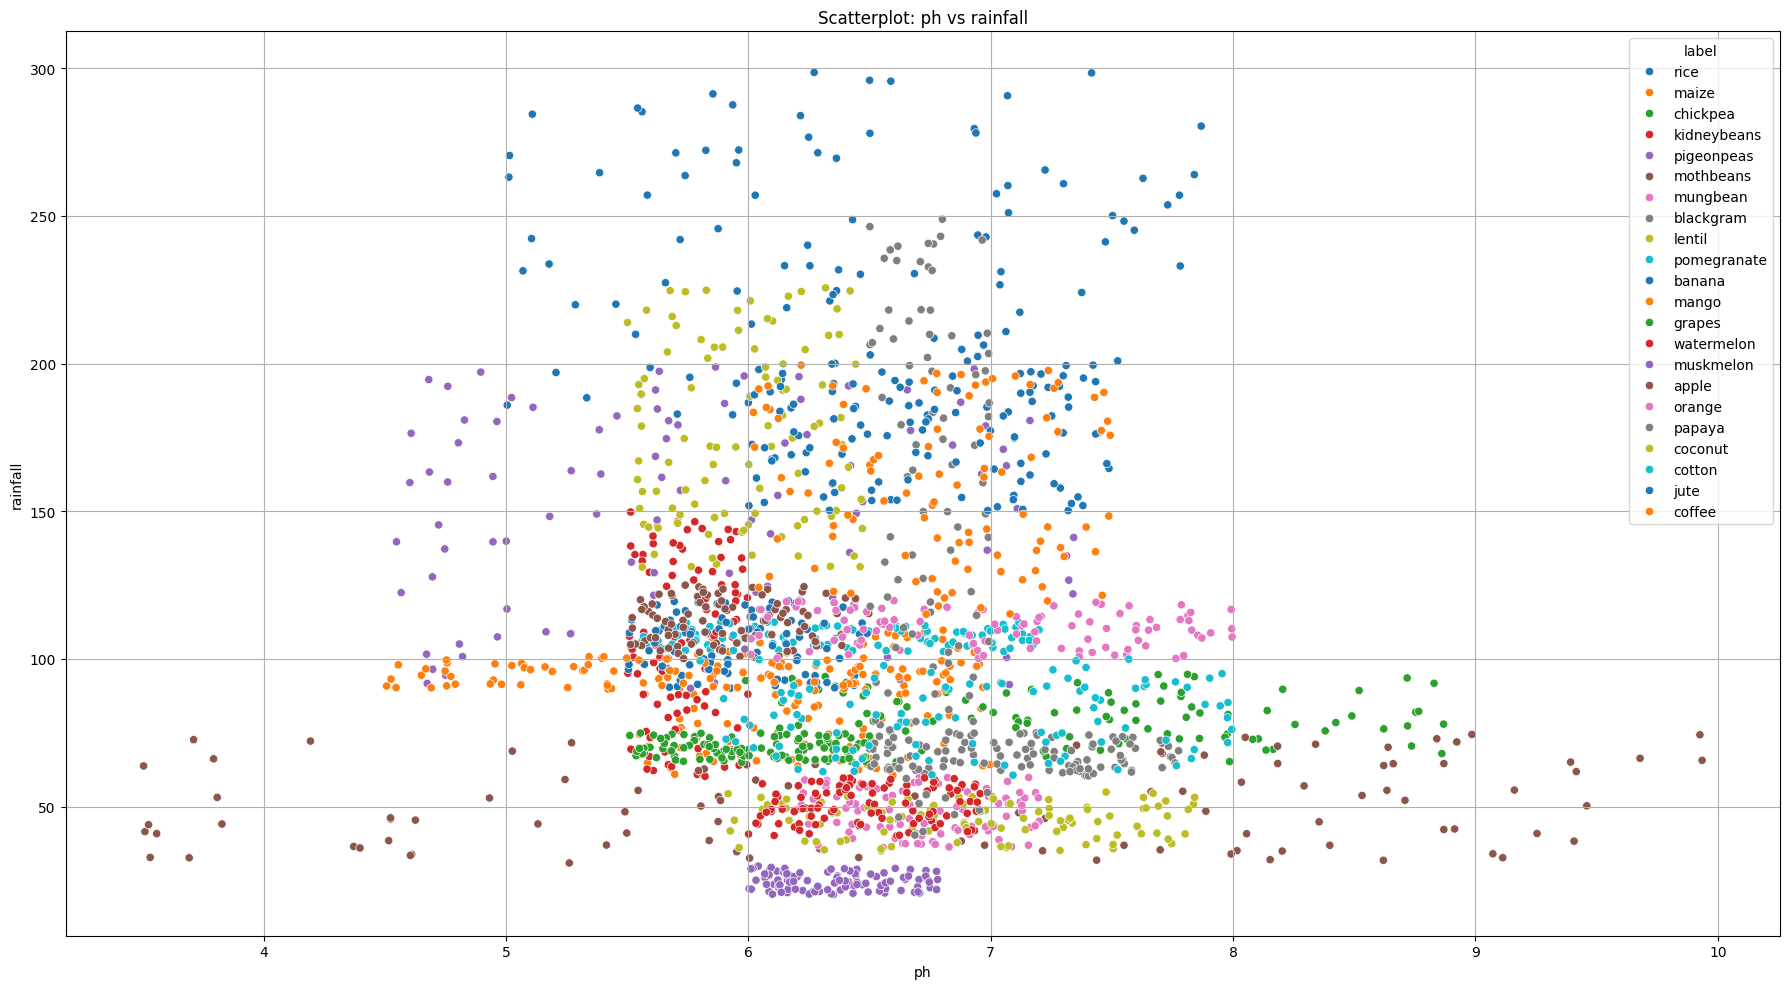

In [112]:
#🔬 Dispersão entre XXXXXXXXXX

plt.figure(figsize=scatter_figsize)
sns.scatterplot(data=df, x=scatter_x, y=scatter_y, hue=coluna_cultivo, palette='tab10')
plt.title(f'Scatterplot: {scatter_x} vs {scatter_y}')
plt.xlabel(scatter_x)
plt.ylabel(scatter_y)
plt.grid(True)
plt.legend(title=coluna_target)
plt.tight_layout()
plt.show()

🧪 Média de.......... (gráfico de barras agrupadas)

Utiliza-se o método groupby para calcular as médias de XXXXXXXXXXXXX, plotando um gráfico de barras agrupadas com Seaborn. Nota-se que......

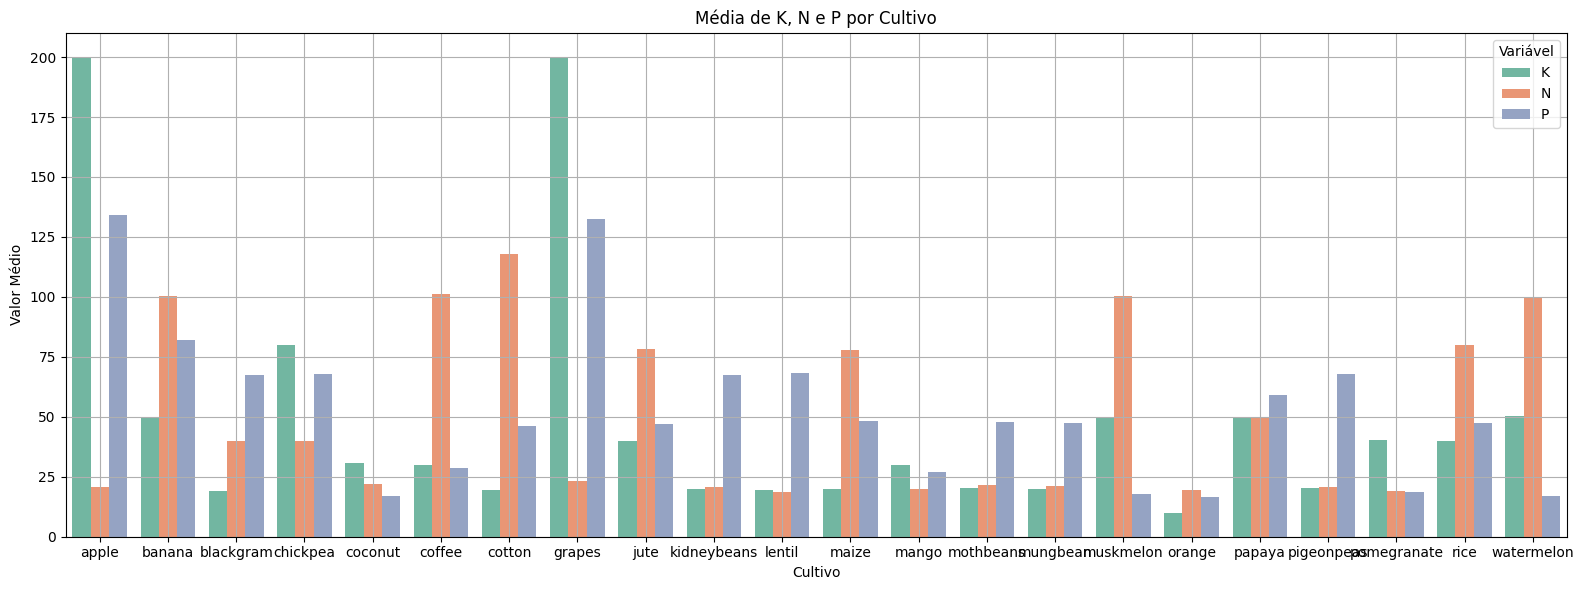

In [113]:
#🧪 Média de........... (gráfico de barras agrupadas)

df_bar = df.groupby(bar_target_col)[bar_cols].mean().reset_index()
df_bar_melted = df_bar.melt(id_vars=bar_target_col,
                            value_vars=bar_cols,
                            var_name=bar_legend_title,
                            value_name=bar_value_name)

plt.figure(figsize=bar_figsize)
sns.barplot(data=df_bar_melted, x=bar_target_col, y=bar_value_name, hue=bar_legend_title, palette=bar_palette)
plt.title(bar_title)
plt.xlabel(bar_xtarget)
plt.ylabel(bar_ytarget)
plt.legend(title=bar_legend_title)
plt.grid(True)
plt.tight_layout()
plt.show()

🔥 Matriz de correlação entre variáveis numéricas

Através do heatmap com annot=True, visualiza-se a correlação entre variáveis contínuas. Isso ajuda a identificar multicolinearidade, que pode prejudicar certos algoritmos (como Regressão Linear). A matriz de correlação representada pelo heatmap abaixo revela como as variáveis numéricas XXXXXXXXXXXXXX se relacionam entre si. O mapa utiliza a escala de cores para indicar o grau de correlação: tons avermelhados para correlações positivas e azulados para negativas.

Dentre os destaques:

-
-
-
-

Essa análise é essencial para entender quais variáveis carregam informações semelhantes e quais trazem diversidade ao conjunto de dados.

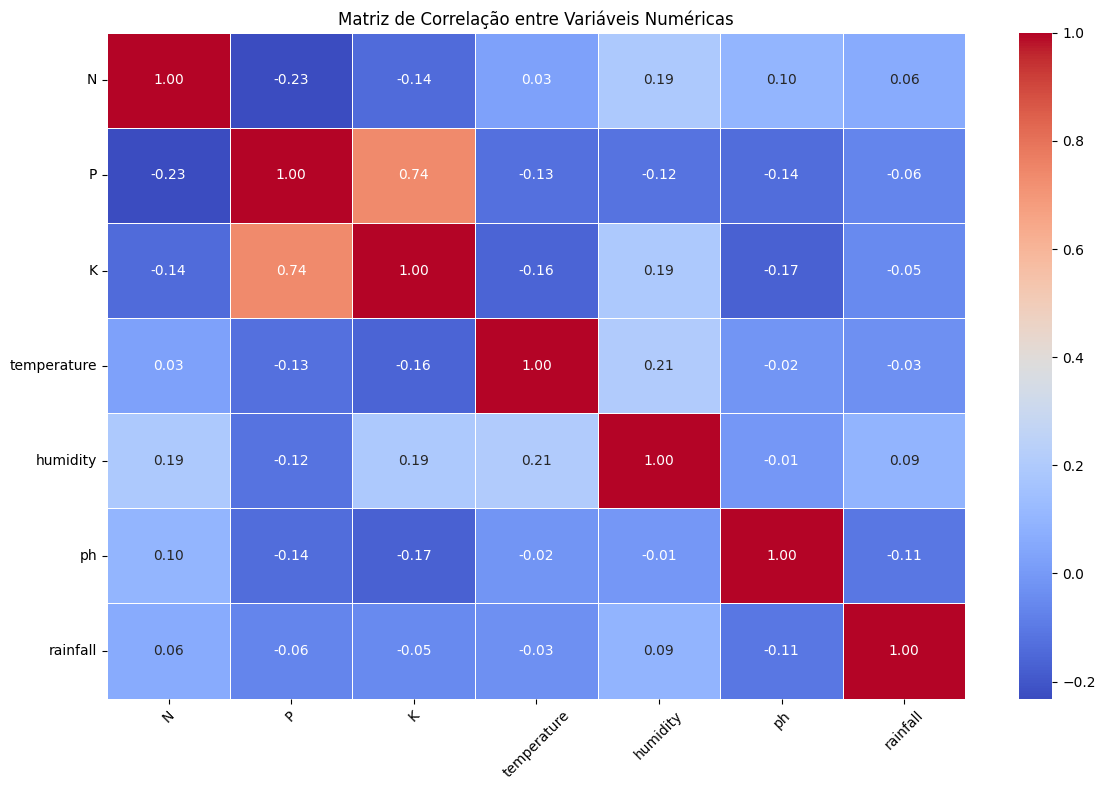

In [114]:
#🔥 Matriz de correlação entre variáveis numéricas

plt.figure(figsize=(12, 8))
corr_matrix = df[variaveis_numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap=corr_cmap, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.xticks(rotation=corr_xtick_rotation)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🔎 Pairplot com coloração por........

O pairplot permite examinar relações bivariadas entre variáveis numéricas, com coloração baseada na variável XXXXXXXXX. Essa técnica é útil para detectar separabilidade visual entre classes. Observa-se............

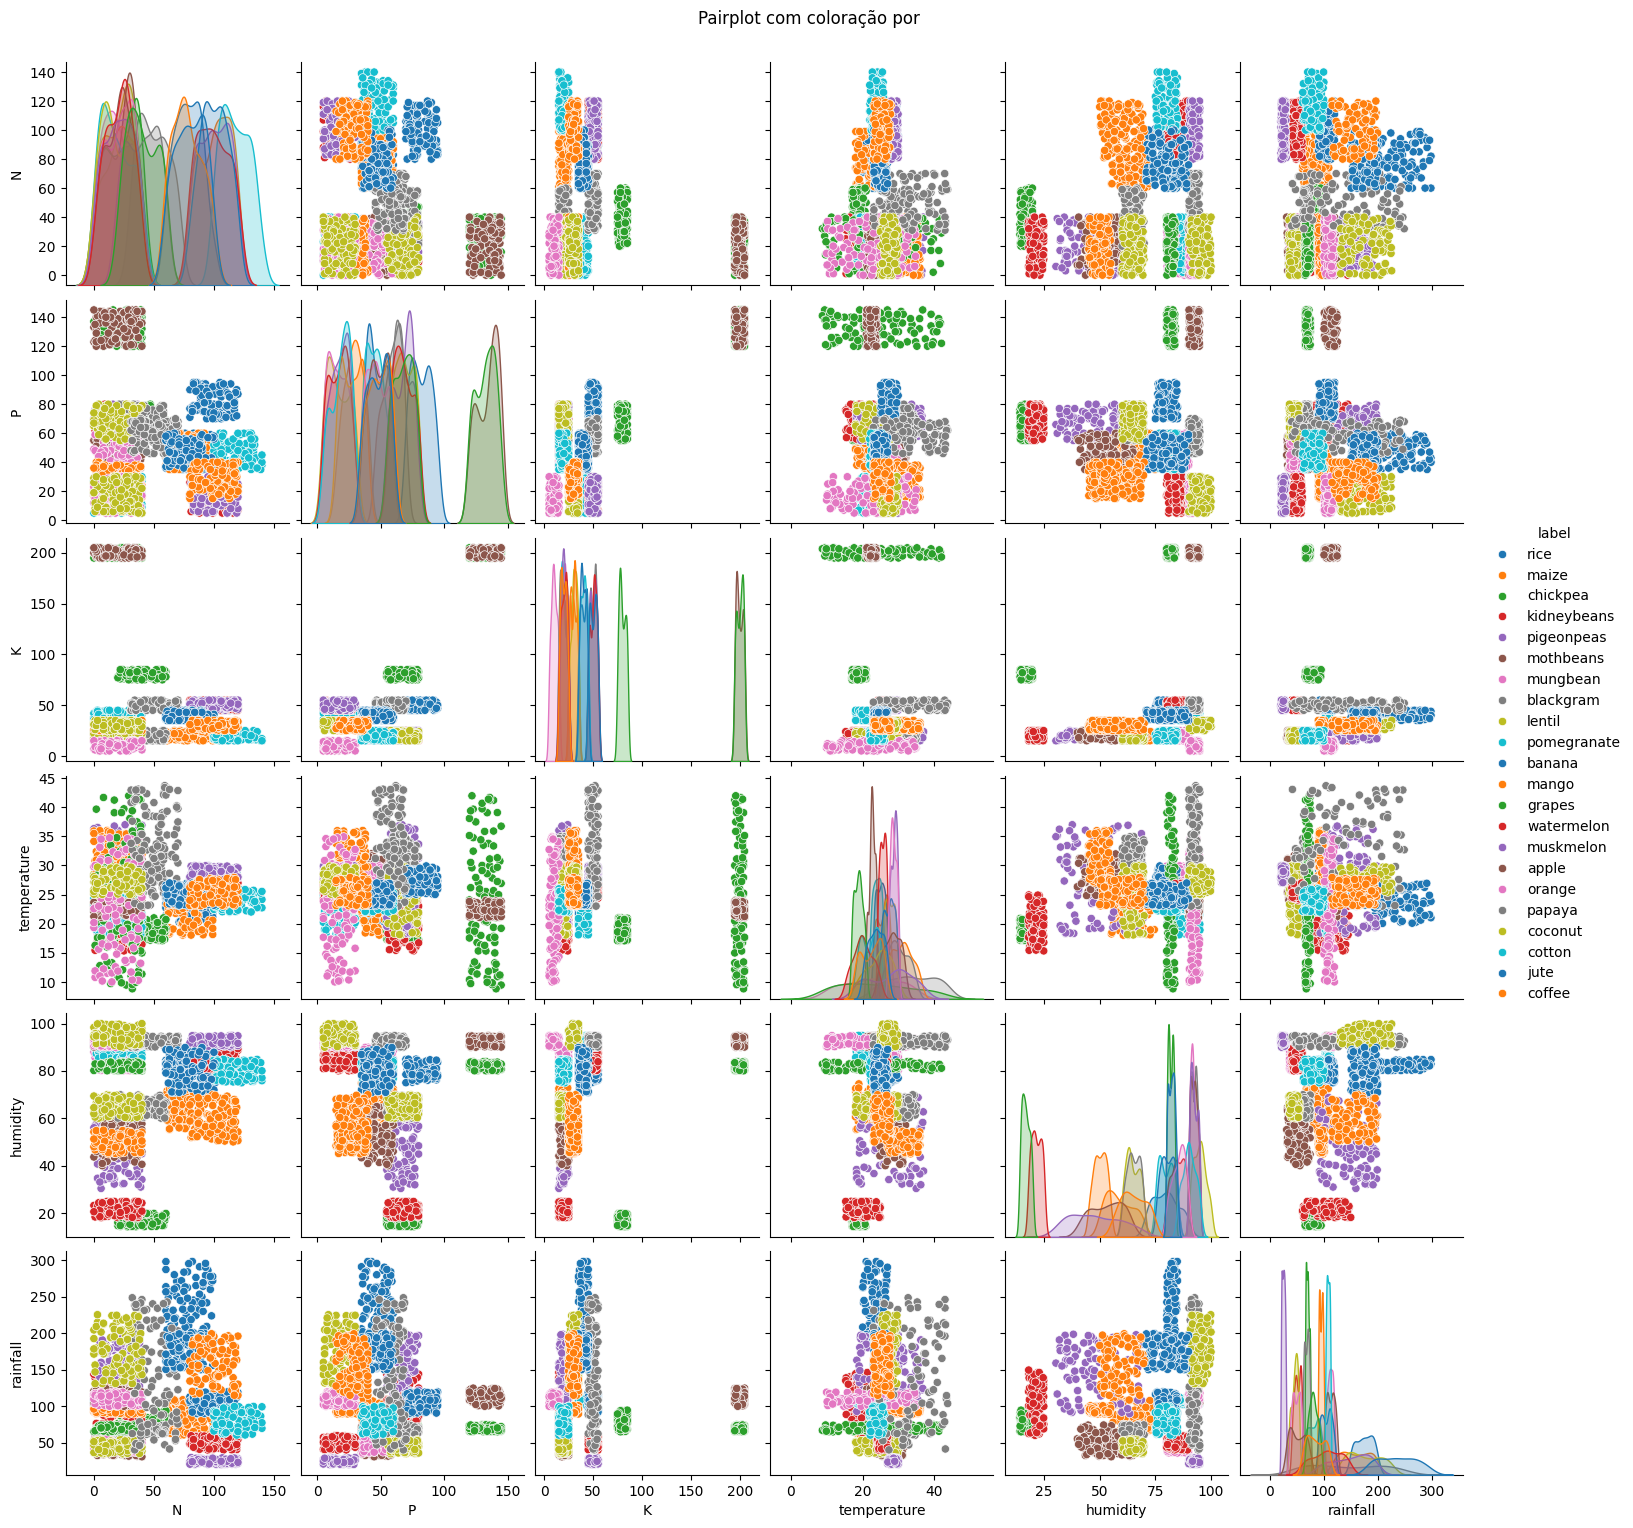

In [115]:
#🔎 Pairplot com coloração por

sns.pairplot(df[pairplot_vars + [pairplot_hue]], hue=pairplot_hue, palette='tab10')
plt.suptitle(pairplot_title, y=1.02)
plt.show()
